In [3]:
import pathlib
from pathlib import Path
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

from xrayto3d_preprocess import  get_barplot,get_segmentation_stats,read_image


In [4]:
subset_dirs = [f'/mnt/SSD0/mahesh-home/xrayto3D-benchmark/2D-3D-Reconstruction-Datasets/lidc/raw/img/subset{i}_outer/tmp/subset{i}/vertebrae_segmentation' for i in range(1,10)]
subset_seg_paths = []
for s in subset_dirs:
    subset_seg_paths.extend(Path(s).glob('*.nii.gz'))
vertebra_count = []
for p in list(subset_seg_paths):
    l = get_segmentation_stats(read_image(p)).GetLabels()
    vertebra_count.append(l)



In [10]:
vertebra_label = []
for i in range(1,24):
    if i <= 7:
        vertebra_label.append(f'C{i}')
    elif i>7 and i<= 19:
        vertebra_label.append(f'T{i-7}')
    else:
        vertebra_label.append(f'L{i-19}')

vertebra_count_dict = { label:0 for label in vertebra_label}
for row in vertebra_count:
    for item in row:
        try:
            vertebra_count_dict[vertebra_label[item-1]] += 1
        except:
            print(item)
print(vertebra_count_dict)

print('total vertebra LIDC',np.sum(list(vertebra_count_dict.values())))

28
28
28
28
{'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0, 'C5': 1, 'C6': 5, 'C7': 48, 'T1': 506, 'T2': 764, 'T3': 769, 'T4': 769, 'T5': 770, 'T6': 769, 'T7': 769, 'T8': 769, 'T9': 769, 'T10': 769, 'T11': 754, 'T12': 588, 'L1': 489, 'L2': 191, 'L3': 30, 'L4': 3}
total vertebra LIDC 9532


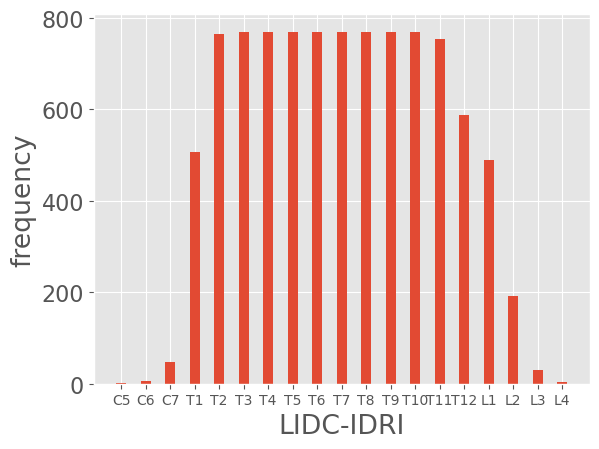

In [13]:
for k in list(vertebra_count_dict.keys()):
    if vertebra_count_dict[k] == 0:
        vertebra_count_dict.pop(k)
fig, ax = get_barplot(vertebra_count_dict)
plt.xlabel('LIDC-IDRI')
plt.ylabel('frequency')
plt.xticks(fontsize=10)
plt.savefig('lidc_stats_plot.pdf')